# INTELLIGENT RAIL

## Edward Jackson

##### Notebook 3 of 6 - Feature engineering (lines, regions and speed restrictions)

In [2]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We import an Excel spreadsheet created by me using an SNCF route map and other online references. Data is not openly available which aggregates all the regions and lines along each individual route.

In [3]:
data = pd.read_excel('data/route_lengths_new.xlsx')

### Feature Engineering - route attributes

In [4]:
data.head()

,Departure_Station,Arrival_Station,Route_Distance_km,lines,regions
0,PARIS MONTPARNASSE,ANGOULEME,390,"431, 566","Centre, Île-de-France, Poitou-Charentes"
1,ANGOULEME,PARIS MONTPARNASSE,390,"431, 566","Centre, Île-de-France, Poitou-Charentes"
2,PARIS MONTPARNASSE,NANTES,339,"431, 429, 408, 450, 515","Île-de-France, Centre, Pays de la Loire"
3,PARIS MONTPARNASSE,POITIERS,292,"431, 566","Centre, Île-de-France, Poitou-Charentes"
4,PARIS MONTPARNASSE,QUIMPER,485,"470, 468, 408, 429, 431","Bretagne, Île-de-France, Centre, Pays de la Loire"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Departure_Station  114 non-null    object
 1   Arrival_Station    114 non-null    object
 2   Route_Distance_km  114 non-null    int64 
 3   lines              114 non-null    object
 4   regions            114 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.6+ KB


We see that the data structure is very simple with just 5 columns. The **Departure_Station** and **Arrival_Station** columns are represent every unique *route* in the TGV punctuality dataset. The **lines** and **regions** columns are lists of the lines and regions making up a particular route; these are in a text-format list.

In order to turn this information into individual features for each route (Alsace: 0 or 1), we need to be able to access each item. We can create a list of 'multi-labels' and then binarise each to one-hot encode the structure of each route: 

In [6]:
# Creating list of multi-labels
regions_list = data['regions'].apply(lambda x: list(x.split(", ")))

# Converting it into dataframe and working on it seperately
regions_df =pd.DataFrame({"Regions":regions_list})
regions_df.head()

,Regions
0,"[Centre, Île-de-France, Poitou-Charentes]"
1,"[Centre, Île-de-France, Poitou-Charentes]"
2,"[Île-de-France, Centre, Pays de la Loire]"
3,"[Centre, Île-de-France, Poitou-Charentes]"
4,"[Bretagne, Île-de-France, Centre, Pays de la L..."


In [7]:
# intantiate the binarizer
mlb = MultiLabelBinarizer()

# fit and transform the regions data
regions_encoded = pd.DataFrame(mlb.fit_transform(regions_df['Regions']), columns=mlb.classes_)
regions_encoded.head()

,Alsace,Aquitaine,Bourgogne,Bretagne,Centre,Champagne-Ardenne,Franche-Comté,Languedoc-Roussillon,Lorraine,Midi-Pyrénées,Nord-Pas-de-Calais,Pays de la Loire,Picardie,Poitou-Charentes,Provence-Alpes-Côte-d'Azur,Rhône-Alpes,Île-de-France
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1


We repeat these steps for the **lines**.

In [8]:
# Creating list of multi-labels; astype('str') behave as string to use split fucntion
lines_list = data['lines'].astype('str').apply(lambda x: list(x.split(", ")))

# Converting it into dataframe and working on it seperately
lines_df =pd.DataFrame({"Lines":lines_list})
lines_df.head()

,Lines
0,"[431, 566]"
1,"[431, 566]"
2,"[431, 429, 408, 450, 515]"
3,"[431, 566]"
4,"[470, 468, 408, 429, 431]"


In [9]:
mlb = MultiLabelBinarizer()
lines_encoded = pd.DataFrame(mlb.fit_transform(lines_df['Lines']), columns=mlb.classes_)
lines_encoded = lines_encoded.add_prefix('lg_')
lines_encoded

,lg_1,lg_14,lg_216,lg_226,lg_226310,lg_262,lg_278,lg_301,lg_408,lg_420,...,lg_768300,lg_830,lg_834,lg_850,lg_89,lg_890,lg_897,lg_900,lg_905,lg_930
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Notice that we have prefixed each line number with the string **lg_** to avoid any confusion later. We prefer not to have column headings with just digits.

We can visualise the number of times each region and line appears in our data. Note that this is not scaled to distance so it would be unsafe to make any other assumptions at this point.

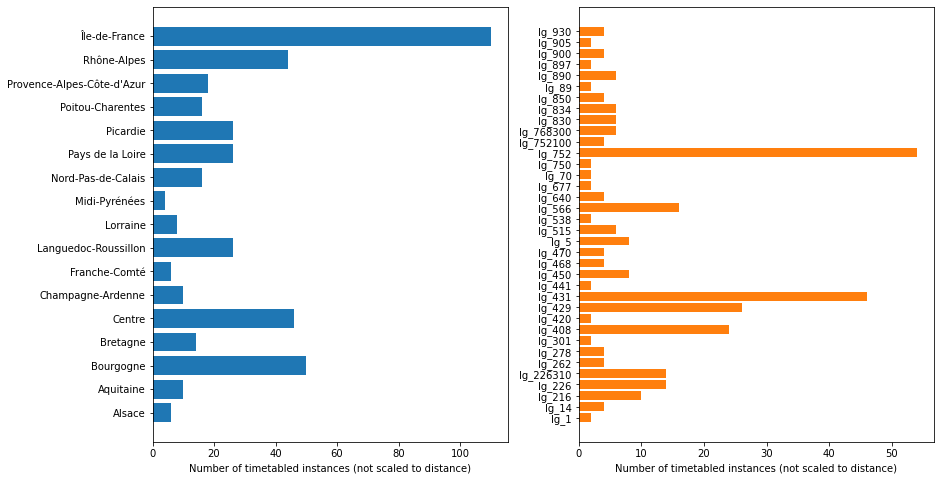

In [10]:
plt.subplots(1,2, figsize=(14,8))

plt.subplot(1,2,1)
plt.barh(regions_encoded.columns, regions_encoded.sum(axis=0), color='C0')
plt.xlabel('Number of timetabled instances (not scaled to distance)')

plt.subplot(1,2,2)
plt.barh(lines_encoded.columns, lines_encoded.sum(axis=0), color='C1')
plt.xlabel('Number of timetabled instances (not scaled to distance)');

It is not a huge surprise to see that *Île-de-France* is the most common region as the capital city, Paris, is located here. *Line 752* is also the longest route in the country running from Paris in the north through to Marseille in the far south!

Now, we concatenate the original data above with the new one-hot encoded regions and lines, not forgetting to drop the two original columns relating to them:

In [11]:
route_attributes = pd.concat([data.drop(columns=['lines','regions']), regions_encoded, lines_encoded], axis=1)
route_attributes

,Departure_Station,Arrival_Station,Route_Distance_km,Alsace,Aquitaine,Bourgogne,Bretagne,Centre,Champagne-Ardenne,Franche-Comté,...,lg_768300,lg_830,lg_834,lg_850,lg_89,lg_890,lg_897,lg_900,lg_905,lg_930
0,PARIS MONTPARNASSE,ANGOULEME,390,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ANGOULEME,PARIS MONTPARNASSE,390,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PARIS MONTPARNASSE,NANTES,339,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PARIS MONTPARNASSE,POITIERS,292,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PARIS MONTPARNASSE,QUIMPER,485,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,PARIS MONTPARNASSE,TOULOUSE MATABIAU,588,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
110,PARIS VAUGIRARD,RENNES,308,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
111,PARIS VAUGIRARD,BORDEAUX ST JEAN,499,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
112,PARIS VAUGIRARD,NANTES,342,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


We can now import our speed restriction data:

In [12]:
speed = pd.read_csv('data/speed_finalised.csv')

In [13]:
speed.head()

,region,CODE_LIGNE,V_MAX
0,Alsace,1000,150.000000
1,Alsace,5000,230.000000
2,Alsace,70000,143.333333
3,Alsace,930000,80.000000
4,Aquitaine,640000,155.000000


In [14]:
speed.shape

(75, 3)

In [15]:
speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      75 non-null     object 
 1   CODE_LIGNE  75 non-null     int64  
 2   V_MAX       75 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


A little bit of cleaning is required to ensure that the format of line codes is identical between tables.

In [16]:
speed.rename(columns={'CODE_LIGNE':'line_code'}, inplace=True)

In [17]:
speed['line_code'] = speed['line_code'].astype('str')

In [18]:
speed['line_code'] = speed['line_code'].str.replace('000','')

In [19]:
speed['line_code'] = 'lg_' + speed['line_code']

Visual inspection flagged a hitherto unused region: **Basse-Normandie**. As it happens, Line 420 does not pass through this region and should instead be attributed to **Centre** region. We adjust a few other regions to bring them in line with other tables.

In [20]:
speed[speed['region']=='Basse-Normandie']

,region,line_code,V_MAX
6,Basse-Normandie,lg_420,140.0


In [21]:
speed['region'] = speed['region'].replace({'Basse-Normandie':'Centre',
                                          'Auvergne':'Rhône-Alpes',
                                          "Provence-Alpes-Côte d'Azur":"Provence-Alpes-Côte-d'Azur"})

In [22]:
speed.head()

,region,line_code,V_MAX
0,Alsace,lg_1,150.000000
1,Alsace,lg_5,230.000000
2,Alsace,lg_70,143.333333
3,Alsace,lg_930,80.000000
4,Aquitaine,lg_640,155.000000


Next, we loop through our speed data and add instances of restrictions to each route affected. Obviously, this may create very large values so we also count the number of speed limit changes. The sum speeds can be divided by the instances to give an average speed restriction:

In [29]:
route_attributes['speed_restrictions']=320
route_attributes['counter']=1

for i in range(0, len(speed)):
    
    print(f'Currently working on row {i} of {len(speed)-1}', end='\r')
    region = speed.loc[i,'region']
    line_code = speed.loc[i,'line_code']
    avg_limit = speed.loc[i,'V_MAX']
    
    mask = (route_attributes[region]==1) & (route_attributes[line_code]==1)
        
    route_attributes.update(route_attributes[mask]['speed_restrictions'] + avg_limit)
    route_attributes.update(route_attributes[mask]['counter'] + 1)

In [30]:
route_attributes['avg_speed_restriction'] = route_attributes['speed_restrictions']/route_attributes['counter']

In [31]:
route_attributes = route_attributes.drop(columns=['speed_restrictions','counter'])

In [32]:
route_attributes.head()

,Departure_Station,Arrival_Station,Route_Distance_km,Alsace,Aquitaine,Bourgogne,Bretagne,Centre,Champagne-Ardenne,Franche-Comté,...,lg_830,lg_834,lg_850,lg_89,lg_890,lg_897,lg_900,lg_905,lg_930,avg_speed_restriction
0,PARIS MONTPARNASSE,ANGOULEME,390,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,247.777778
1,ANGOULEME,PARIS MONTPARNASSE,390,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,247.777778
2,PARIS MONTPARNASSE,NANTES,339,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,213.684524
3,PARIS MONTPARNASSE,POITIERS,292,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,247.777778
4,PARIS MONTPARNASSE,QUIMPER,485,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,218.208333


This is not a perfect method of aggregation by any means. However, we can see that we have done quite a good job of realising a plausible (and realistic) distribution of restrictions. We would not expect the average speed on a high speed line to be anything other than... fast!

In [33]:
route_attributes['avg_speed_restriction'].describe()

count    114.000000
mean     244.167121
std       30.902707
min      185.253968
25%      217.500000
50%      247.777778
75%      272.000000
max      300.000000
Name: avg_speed_restriction, dtype: float64

##### Exporting finalised data

In [34]:
route_attributes.to_csv('data/labelled_route_features.csv', index=False)